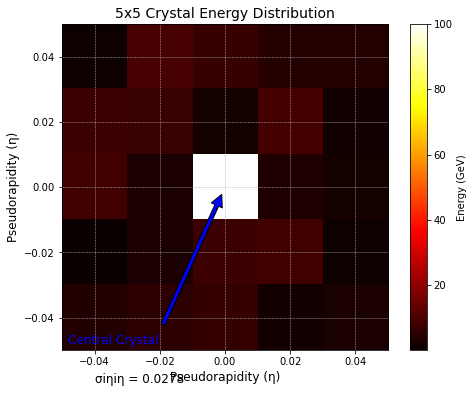

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
matrix_size = 5
central_energy = 100  # Energy of the central crystal
energy_distribution = np.random.rand(matrix_size, matrix_size) * 10
energy_distribution[2, 2] = central_energy  # Set the central crystal energy

# Pseudorapidity values
eta_values = np.linspace(-0.05, 0.05, matrix_size)
eta, phi = np.meshgrid(eta_values, eta_values)

# Weights (wi) calculation based on the log-weight formula
E_total = np.sum(energy_distribution)
weights = np.maximum(0, 4.7 + np.log(energy_distribution / E_total))

# Weighted pseudorapidity calculation
eta_mean = np.sum(weights * eta) / np.sum(weights)
sigma_eta = np.sqrt(np.sum(weights * (eta - eta_mean)**2) / np.sum(weights))

# Plotting the 5x5 crystal matrix
fig, ax = plt.subplots(figsize=(8, 6))
c = ax.imshow(energy_distribution, cmap='hot', interpolation='nearest', extent=[-0.05, 0.05, -0.05, 0.05])
ax.set_title("5x5 Crystal Energy Distribution", fontsize=14)
ax.set_xlabel("Pseudorapidity (η)", fontsize=12)
ax.set_ylabel("Pseudorapidity (η)", fontsize=12)
plt.colorbar(c, label="Energy (GeV)")

# Annotating the central crystal
ax.annotate("Central Crystal",
            xy=(0, 0), xycoords='data',
            xytext=(0.02, 0.02), textcoords='axes fraction',
            arrowprops=dict(facecolor='blue', shrink=0.05),
            fontsize=12, color='blue')

# Displaying sigma_eta value
plt.text(-0.04, -0.06, f"σiηiη = {sigma_eta:.4f}", fontsize=12, color='black')

plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()
